<a href="https://colab.research.google.com/github/caesarcc/pucminas-tcc-fake-news-detection/blob/main/passo04_analise_exploracao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise e explocação do dataset

### Iniciando pela configuração do Google Colab

In [1]:
# Configura acesso ao Google Driver onde serão salvos os arquivos grandes
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [94]:
# Importação de bibliotecas utilizadas no pré-processamento
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from IPython.display import display
%matplotlib inline
pd.set_option("display.max_rows", 50, 'display.max_colwidth', 250)

### Carregar arquivo CSV das bases unificadas e validar

In [4]:
dados = pd.read_csv(r'/content/drive/MyDrive/PUC/TCC/dados/dataset_tratado.csv', sep = ',', names=['classe', 'texto', 'qtde_palavras', 'texto_processado'], header=1).reset_index(drop=True)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8063 entries, 0 to 8062
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   classe            8063 non-null   int64 
 1   texto             8063 non-null   object
 2   qtde_palavras     8063 non-null   int64 
 3   texto_processado  8063 non-null   object
dtypes: int64(2), object(2)
memory usage: 252.1+ KB


### Nuvens de palavras para conferir os destaques

In [136]:
# Coleta todas palavras e remove pontuação para facilitar vizualização
palavras_confiavel = re.sub(' +', ' ', re.sub(r'[^a-zA-ZÀ-ÿ]', ' ', 
              ' '.join(dados[dados['classe']==0]['texto_processado'].str.lower())))
palavras_falsa = re.sub(' +', ' ', re.sub(r'[^a-zA-ZÀ-ÿ]', ' ',
              ' '.join(dados[dados['classe']==1]['texto_processado'].str.lower())))

# Monta contagem de frequencia das 100 palavras mais comuns 
contagem_confiavel = Counter(palavras_confiavel.split()).most_common(100)
contagem_falsa = Counter(palavras_falsa.split()).most_common(100)

# Monta lista somente com as palavras unicas
lista_confiavel = [palavra[0] for palavra in contagem_confiavel]
lista_falsa = [palavra[0] for palavra in contagem_falsa]

# Monta lista somente com as palavras unicas
palavras_confiavel = ' '.join([palavra for palavra in re.split("\W+", palavras_confiavel) if palavra.lower() in lista_confiavel])
palavras_falsa = ' '.join([palavra for palavra in re.split("\W+", palavras_falsa) if palavra.lower() in lista_falsa])

In [119]:
def plota_nuvens(listaLeft, listaRight, tituloLeft, tituloRight):
  wcLeft = WordCloud(background_color='black', width=800, height=600)
  nuvemLeft = wcLeft.generate(listaLeft)
  wcRight = WordCloud(background_color='black', width=800, height=600)
  nuvemRight = wcRight.generate(listaRight)

  # Plots núvens lado a lado para comparar
  plt.figure(figsize=(18,25))
  f, plots = plt.subplots(nrows=1, ncols=2, figsize=(25, 50))
  plots[0].imshow(nuvemLeft)
  plots[0].set_title(f'Nuvem das Amostras: {tituloLeft}')
  plots[1].imshow(nuvemRight)
  plots[1].set_title(f'Nuvem das Amostras: {tituloRight}')
  plt.show()

### Gerando nova nuvem de palavras com as 100 mais frequentes

<Figure size 1296x1800 with 0 Axes>

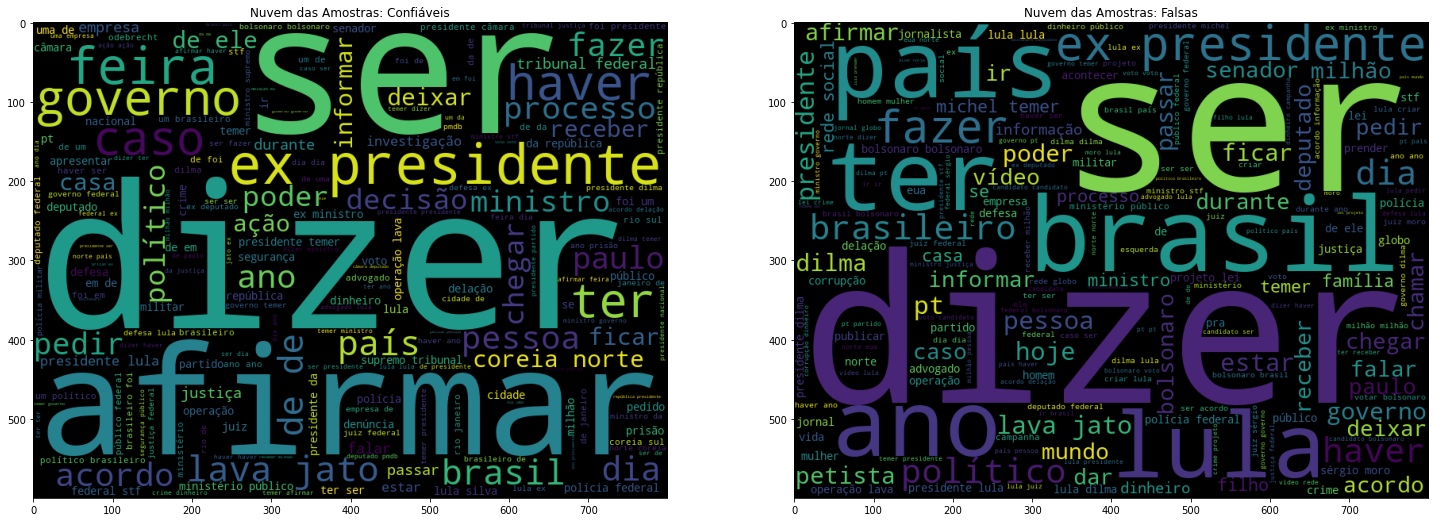

In [137]:
plota_nuvens(
    palavras_confiavel, palavras_falsa, 'Confiáveis', 'Falsas'
)

In [147]:
palavras_remover = ['de','ser','dizer','ano','haver','a','afirmar','o','ter','do','dia','é','r','pessoa','foi','da','fazer','em','um','ficar',
                    'pedir','e','receber','s','ele','durante','casa','chegar','estar','pedido','passar','uma','poder','falar','cidade','ir',
                    'deixar','com','se','informar','apresentar', 'hoje']
# Monta lista somente com as palavras unicas
palavras_confiavel = ' '.join([palavra for palavra in re.split("\W+", palavras_confiavel) if palavra.lower() not in palavras_remover])
palavras_falsa = ' '.join([palavra for palavra in re.split("\W+", palavras_falsa) if palavra.lower() not in palavras_remover])

### Gerando word cloud removendo lista selecionada manualmente

<Figure size 1296x1800 with 0 Axes>

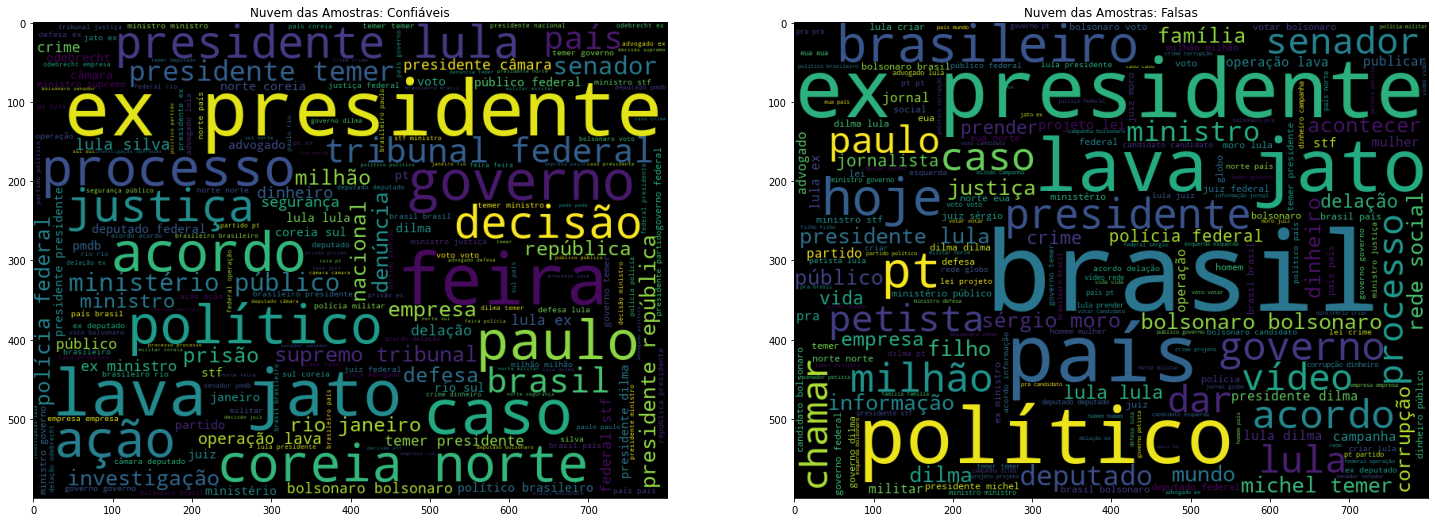

In [148]:
plota_nuvens(
    palavras_confiavel, palavras_falsa, 'Confiáveis', 'Falsas'
)

In [151]:
# Coleta todas palavras e remove pontuação para facilitar vizualização
palavras_confiavel = re.sub(' +', ' ', re.sub(r'[^a-zA-ZÀ-ÿ]', ' ', 
              ' '.join(dados[dados['classe']==0]['texto_processado'])))
palavras_falsa = re.sub(' +', ' ', re.sub(r'[^a-zA-ZÀ-ÿ]', ' ',
              ' '.join(dados[dados['classe']==1]['texto_processado'])))

def avaliar_ngrams(corpus, title, n=2, top=20, plot_pos=None):
  serie_plot = (pd.Series(nltk.ngrams(corpus.split(), n)).value_counts())[:top]
  serie_plot.sort_values().plot.barh(color='blue', width=.9, ax=plot_pos, title=title, figsize=(24, 8))

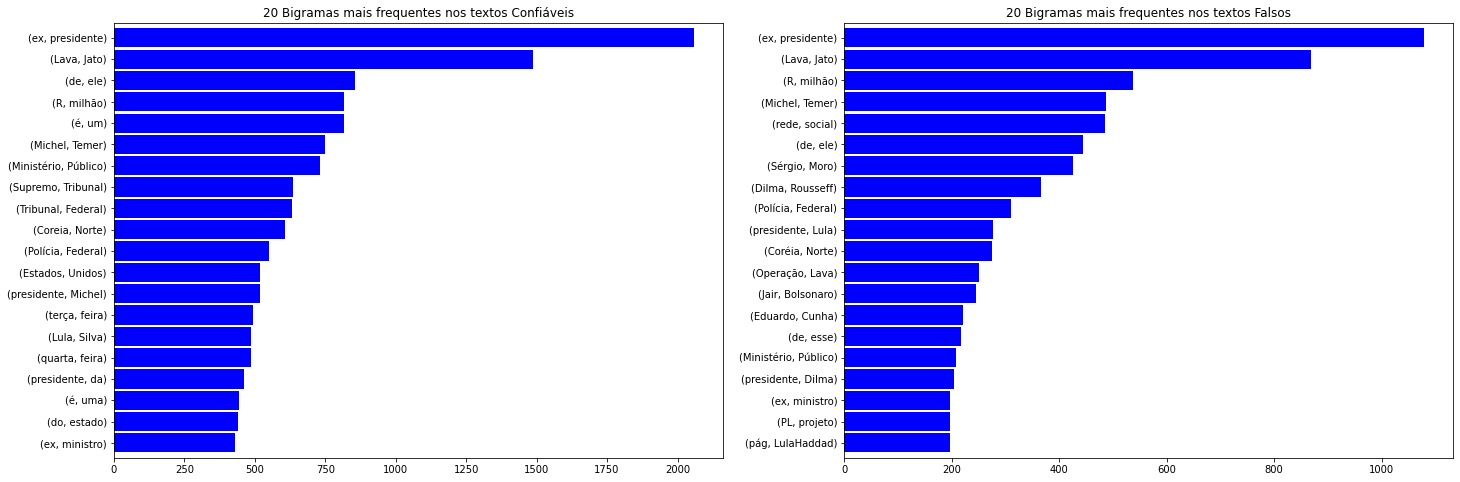

In [152]:
fig, axes = plt.subplots(nrows=1, ncols=2)
avaliar_ngrams(palavras_confiavel, '20 Bigramas mais frequentes nos textos Confiáveis', plot_pos=axes[0])
avaliar_ngrams(palavras_falsa, '20 Bigramas mais frequentes nos textos Falsos', plot_pos=axes[1])
#Penso em futuramente remover os primeiros ítems para evitar viés, e ou atualizar o corpus com notícias atuais, pois representa um ponto no tempo

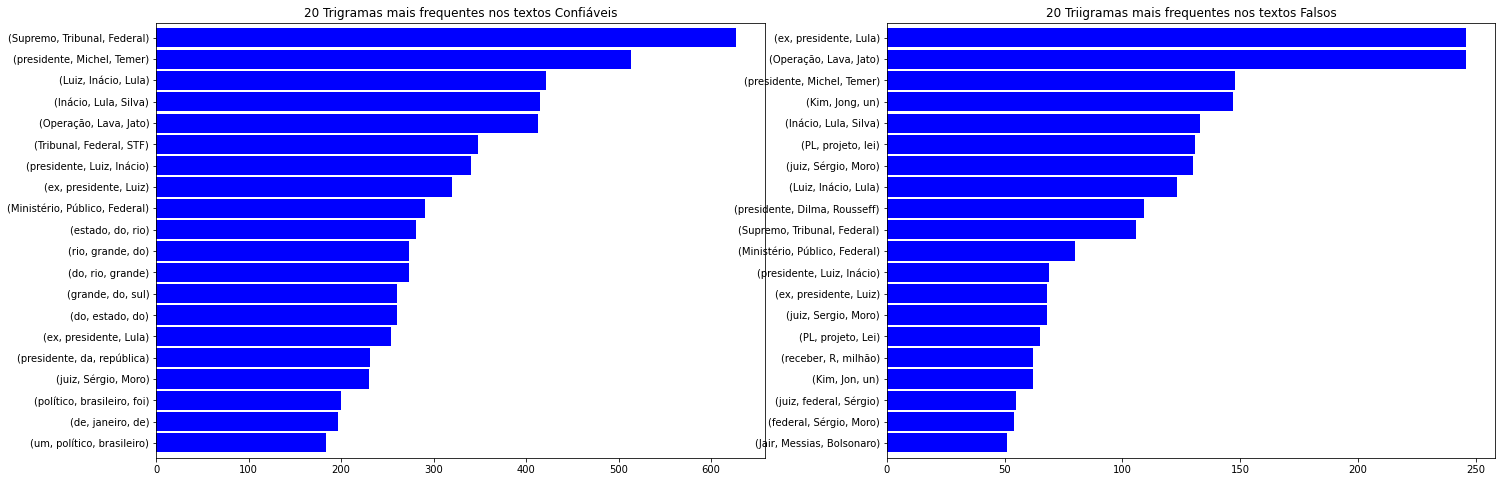

In [153]:
fig, axes = plt.subplots(nrows=1, ncols=2)
avaliar_ngrams(palavras_confiavel, '20 Trigramas mais frequentes nos textos Confiáveis', n=3, plot_pos=axes[0])
avaliar_ngrams(palavras_falsa, '20 Triigramas mais frequentes nos textos Falsos', n=3, plot_pos=axes[1])
#Com a visualização das trigramas dificulta fazer cortes, mas vejo que algumas trigramas se repetem em ordem diferente, 
# espero que o modelo BERT lide bem com isto, pois aqui estou usando o NLTK

In [ ]:
# Salva dados para uso no notebook do próximo passo.
dados.to_csv('/content/drive/MyDrive/PUC/TCC/dados/dataset_tratado.csv', sep = ',', index=False)